In [1]:
#Пичужкина О. В.

import os
import re
import numpy as np
import matplotlib.pyplot as plt
#импорт всех необходимых библиотек

anaphors_by_authors = {}
anaphors_by_authors_len = {}
anaphors_by_authors_len_words = {}
anaphors = open('anaphors.txt', 'w') #создаёт пустой словарь и файл для анафор

def get_phrase(text, i):
    return text[i].strip(' ') 

def get_first_word(text, i):
    return (((get_phrase(text, i).split(' '))[0]).lower())

#функции, которые достают из разбитого на фрагменты текста фрагмент и его первое слово по номеру фрагмента

files = os.listdir()
for file in files:
    if file.endswith('txt') and file != 'anaphors.txt':
        author = (file.split('_'))[0]
        anaphors_by_authors[author] = []
        anaphors_by_authors_len[author] = []
        anaphors_by_authors_len_words[author] = []
        f = open(file, 'r', errors = 'ignore')
        text = f.read()
        text = re.findall(r"[\w' ]+", text) #разбивает текст на фрагменты
        word = ''
        is_anaphora = False
        phrase = ''
        len_phrase = 0
        for i in range(len(text)):
            if get_first_word(text, i) == word:
                is_anaphora = True
                phrase += (' ' + get_phrase(text, i))
                len_phrase += 1
            else:
                is_anaphora = False
                if len_phrase > 1:
                    anaphors_by_authors[author].append(phrase)
                    anaphors_by_authors_len[author].append(len_phrase)
                    anaphors_by_authors_len_words[author].append(len(phrase.split(' ')))
                phrase = get_phrase(text, i)
                len_phrase = 1       
                word = get_first_word(text, i) #находит анафоры и записывает их в словарь
        f.close()

In [2]:
print(anaphors_by_authors)
#полный список анафор

{'Vergil': ['hic illivs arma hic cvrrvs fvit hoc regnvm dea gentibvs esse', 'qvid mevs Aeneas in te committere tantvm qvid Troes potvere qvibvs tot fvnera passis', 'an Phoebi soror an Nympharvm sangvinis vna', 'miratvr molem Aeneas magalia qvondam miratvr portas strepitvm qve et strata viarvm', 'svnt hic etiam sva praemia lavdi svnt lacrimae rervm et mentem mortalia tangvnt', 'hac fvgerent Grai premeret Troiana ivventvs hac Phryges instaret cvrrv cristatvs Achilles', 'nvnc qvibvs Avrorae venisset filivs armis nvnc qvales Diomedis eqvi nvnc qvantvs Achilles', 'avt hoc inclvsi ligno occvltantvr Achivi avt haec in nostros fabricata est machina mvros', 'nec mihi iam patriam antiqvam spes vlla videndi nec dvlcis natos exoptatvm qve parentem', 'fas mihi Graiorvm sacrata resolvere ivra fas odisse viros at qve omnia ferre svb avras', 'cvi parvvs Ivlvs cvi pater et conivnx qvondam tva dicta relinqvor', 'ter conatvs ibi collo dare bracchia circvm ter frvstra comprensa manvs effvgit imago', 'nos 

In [3]:
for author in anaphors_by_authors:
    anaphors.write(author + ': ' + str(len(anaphors_by_authors[author])) + '\n')
    print(author + ': ' + str(len(anaphors_by_authors[author])))
    for s in anaphors_by_authors[author]:
        anaphors.write(s + '\n')
anaphors.close() #записывает все анафоры (и кол-во по авторам) в файл

Vergil: 65
Cicero: 158
Caesar: 39
Tacitus: 42
Manilius: 31


In [4]:
for author in anaphors_by_authors_len:
    print(author + ': ' + str(np.mean(anaphors_by_authors_len[author]))) #средняя длина анафор по авторам по количеству фраз

Vergil: 2.046153846153846
Cicero: 2.170886075949367
Caesar: 2.1794871794871793
Tacitus: 2.0714285714285716
Manilius: 2.129032258064516


In [5]:
for author in anaphors_by_authors_len:
    print(author + ': ' + str(max(anaphors_by_authors_len[author]))) #максимальная длина анафор по авторам по количеству фраз

Vergil: 3
Cicero: 5
Caesar: 4
Tacitus: 4
Manilius: 4


In [6]:
for author in anaphors_by_authors_len_words:
    print(author + ': ' + str(np.mean(anaphors_by_authors_len_words[author]))) #средняя длина анафор по авторам по количеству слов

Vergil: 12.415384615384616
Cicero: 7.246835443037975
Caesar: 10.0
Tacitus: 6.619047619047619
Manilius: 15.387096774193548


In [7]:
for author in anaphors_by_authors_len_words:
    print(author + ': ' + str(max(anaphors_by_authors_len_words[author]))) #максимальная длина анафор по авторам по количеству слов

Vergil: 22
Cicero: 22
Caesar: 21
Tacitus: 14
Manilius: 29


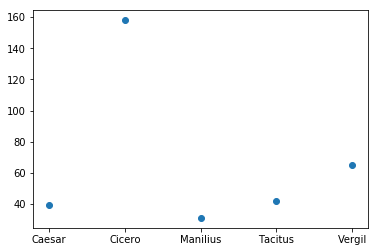

In [8]:
authors = []
numbers = []
for author in anaphors_by_authors:
    authors.append(author)
    numbers.append(len(anaphors_by_authors[author]))
plt.scatter(authors, numbers, label = 'Количество анафор у разных авторов')
plt.show()